#Day 2: TensorFlow Basics & The Limits of MLPs
###Welcome to Day 2!

Yesterday, we built a Multi-Layer Perceptron (MLP) that performed great on the simple MNIST dataset.

###Today's Plan:

TensorFlow Basics: Learn how to load a custom dataset of color images from folders using tf.keras.utils.

The Challenge: We'll use our Day 1 "multilayer ANN" (MLP) to classify "Fresh vs. Rotten Fruit."

Backpropagation: We'll train the model, which relies on this core "backpropagation" concept to learn.

Analyze: We will (intentionally) see this model struggle and discuss why. This sets us up for Day 3.


## Important Setup (Please Read!)
For this notebook, you must download the "Fresh and Rotten Fruits" dataset from Kaggle.

Go to this Kaggle page: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification

or Directly download the dataset from , Drive https://drive.google.com/drive/folders/1p2PfNZBULOWGRCl_xgwfPXLwoXiJRsJD?usp=sharing

Download the archive.zip file.

Unzip it. You will get a folder named dataset.

Place this dataset folder in the same directory where you are running this Jupyter Notebook.

##Cell 1: Setup - Importing Libraries
Let's import our standard libraries. We'll add os to help us check our file paths.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

print(f"TensorFlow Version: {tf.__version__}")
print("Libraries imported.")

TensorFlow Version: 2.19.0
Libraries imported.


##Cell 2: Define Dataset Parameters
We need to set some global parameters for our model, like the image size we want to use and the batch size for training.

In [2]:
# We will resize all images to 64x64
IMG_SIZE = 64
print(f"Image size set to: {IMG_SIZE}x{IMG_SIZE} pixels")

Image size set to: 64x64 pixels


##Why IMG_SIZE = 64?
 It's not a magic number, but a practical choice based on a trade-off between Detail and Speed.

Detail (Why not smaller, like 32x32?) For this problem, the model needs to see the difference between "fresh" and "rotten." This means it needs to see features like texture (spots, mold, wrinkles) and color. If we make the image too small (e.g., 32x32), it might become a blurry blob. We need enough pixels for these details to be visible.

Speed (Why not bigger, like 256x256?) More pixels mean much more data for the model to process.

64 x 64 x 3 (channels) = 12,288 features (as we saw in the MLP).

256 x 256 x 3 (channels) = 196,608 features!

A larger image would make our network massively larger, take a very long time to train, and be much more likely to overfit (memorize) the data.

Conclusion: 64x64 is a common starting point for image classification. It's small enough to train quickly on a standard computer but large enough to preserve the basic shapes, colors, and textures the model needs to make an accurate decision.

In [3]:
# We will train in batches of 32 images at a time
BATCH_SIZE = 32
print(f"Batch size set to: {BATCH_SIZE}")

Batch size set to: 32


In [4]:
# Our images have 3 color channels (R, G, B)
CHANNELS = 3
print(f"Number of color channels: {CHANNELS}")

Number of color channels: 3


In [5]:
# Our dataset has 6 classes
NUM_CLASSES = 6
print(f"Number of classes: {NUM_CLASSES}")

Number of classes: 6


##Cell 3: Define File Paths
Let's define the paths to our train and test directories from the dataset you downloaded.

In [8]:
# ===============================================
# Ececute this cell only when you have Dataset already downloaded else , go to next cell
# =============================================

import os

# Base directory
base_dir = r"D:\dataset_Fruits"  #set your dataset path
print(f"Base directory: {base_dir}")
print("Exists:", os.path.exists(base_dir))

# Training data path
train_dir = os.path.join(base_dir, "train")
print(f"Training data path: {train_dir}")
print("Exists:", os.path.exists(train_dir))

# Test data path
test_dir = os.path.join(base_dir, "test")
print(f"Test data path: {test_dir}")
print("Exists:", os.path.exists(test_dir))


Base directory: D:\dataset_Fruits
Exists: True
Training data path: D:\dataset_Fruits\train
Exists: True
Test data path: D:\dataset_Fruits\test
Exists: True


In [7]:
# =============================================
# Execute this code only when you Dont have dataset
# ==============================================
# Download the dataset from Kaggle using kagglehub

import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sriramr/fruits-fresh-and-rotten-for-classification")

print("Path to dataset files:", path)

# The downloaded dataset structure is typically dataset/train and dataset/test
# Adjust the base_dir to point to the extracted dataset folder
base_dir = os.path.join(path, "dataset")

print(f"Base directory: {base_dir}")
print("Exists:", os.path.exists(base_dir))


# Training data path
train_dir = os.path.join(base_dir, "train")
print(f"Training data path: {train_dir}")
print("Exists:", os.path.exists(train_dir))

# Test data path
test_dir = os.path.join(base_dir, "test")
print(f"Test data path: {test_dir}")
print("Exists:", os.path.exists(test_dir))

100%|██████████| 3.58G/3.58G [00:37<00:00, 102MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1
Base directory: /root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1/dataset
Exists: True
Training data path: /root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1/dataset/train
Exists: True
Test data path: /root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1/dataset/test
Exists: True


Cell 4: Load Training Data (TensorFlow Basics)
This is a key "TensorFlow Basic." We're not loading a built-in dataset like MNIST. We're loading our own images from folders.

We use image_dataset_from_directory to do this. This function is amazing! It automatically:

Finds all the subfolders (e.g., fresh_apple) and uses them as class labels.

Resizes all images to our IMG_SIZE.

Creates batches of BATCH_SIZE.

Converts labels to categorical (one-hot encoding) because we have 6 classes.

In [9]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

print("\nLoaded Training Data.")
print(f"Found {train_dataset.cardinality().numpy() * BATCH_SIZE} total images in {len(train_dataset.class_names)} classes.")
print("Note: The 'class names' are the folder names.")

Found 10901 files belonging to 6 classes.

Loaded Training Data.
Found 10912 total images in 6 classes.
Note: The 'class names' are the folder names.


##Learning Note: image_dataset_from_directory

This function is your best friend for image classification. It assumes your directory is structured like this:

dataset/
├── train/
│   ├── fresh_apple/
│   │   ├── img1.png
│   │   └── img2.png
│   ├── rotten_banana/
│   │   ├── img3.png
│   │   └── img4.png
│   └── ...
└── test/
    ├── fresh_apple/
    │   └── img5.png
    └── ...

    
It automatically uses the subfolder names (fresh_apple, rotten_banana) as the labels. This is much easier than loading every image and label by hand!

## Cell 5: Load Validation/Test Data
Now we do the exact same thing for our test (validation) data.

In [9]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

print("\nLoaded Validation (Test) Data.")
print(f"Found {validation_dataset.cardinality().numpy() * BATCH_SIZE} total images in {len(validation_dataset.class_names)} classes.")

Found 2698 files belonging to 6 classes.

Loaded Validation (Test) Data.
Found 2720 total images in 6 classes.


### Visualizing the 64x64 Resize
You asked why we picked IMG_SIZE = 64. Let's visualize what that resizing looks like. We'll load one image from the disk twice: once in its original size and once resized to 64x64.

You can see how the 64x64 version is much smaller and "blockier," but it still keeps the main features (the apple's shape and color).

##Cell 6: Inspect the Class Names
Let's see the classes that the loader found. The order in this list is the order the model will use (e.g., 0 = fresh_apple, 1 = fresh_banana, etc.).

In [10]:
class_names = train_dataset.class_names
print("The 6 classes found are:")
for i, name in enumerate(class_names):
    print(f"  Index {i}: {name}")

The 6 classes found are:
  Index 0: freshapples
  Index 1: freshbanana
  Index 2: freshoranges
  Index 3: rottenapples
  Index 4: rottenbanana
  Index 5: rottenoranges


##Cell 7: Check Data Shapes
Let's pull one batch from our train_dataset and check the shape of the images and labels. This is critical for debugging.

In [11]:
# .take(1) grabs a single batch from the dataset
# We use a loop to "iterate" over this single batch
for images, labels in train_dataset.take(1):
    print("Pulled one batch from the training dataset.")
    images_batch_shape = images.shape
    labels_batch_shape = labels.shape

Pulled one batch from the training dataset.


In [12]:
# Now let's inspect the shapes
print(f"Images batch shape: {images_batch_shape}")
print(f"Labels batch shape: {labels_batch_shape}")

Images batch shape: (32, 64, 64, 3)
Labels batch shape: (32, 6)


Images batch shape: (32, 64, 64, 3): We have a batch of 32 images, each is 64x64 pixels, with 3 color channels (R,G,B).

Labels batch shape: (32, 6): We have 32 labels, and each label is a 6-element array (one-hot encoded).

For example, fresh_banana (index 1) would be: [0, 1, 0, 0, 0, 0]

###Cell 7b: Example of a One-Hot Encoded Label
Let's look at the label for the first image in this batch and see what one-hot encoding means.

In [13]:
# Get the first label from the batch
first_label_encoded = labels[0]
print(f"One-hot encoded label for the first image:\n {first_label_encoded}")

One-hot encoded label for the first image:
 [0. 0. 0. 0. 0. 1.]


In [14]:
# Use np.argmax() to find the index of the '1'
first_label_index = np.argmax(first_label_encoded)
print(f"\nThe index with the '1' is: {first_label_index}")


The index with the '1' is: 5


In [15]:
# Now map this index back to the class name
first_label_name = class_names[first_label_index]
print(f"\nThis corresponds to the class: '{first_label_name}'")


This corresponds to the class: 'rottenoranges'


###Learning Note: label_mode='categorical' (One-Hot) vs. label_mode='int' (Sparse)

Yesterday (Day 1), our MNIST labels were just numbers: [5, 0, 7, ...]. This is called integer or sparse labeling. For this, we must use loss='sparse_categorical_crossentropy'.

Today (Day 2), our labels are one-hot encoded: [0, 1, 0, 0, 0, 0]. This is called categorical labeling. For this, we must use loss='categorical_crossentropy'.

We set this in image_dataset_from_directory with label_mode='categorical'. This is the standard for multi-class classification.

##Cell 8: Visualize the Data
Let's see what we're working with! We'll plot the first 9 images from the single batch we just loaded.

Preparing to plot the first 9 images from the batch...
Displaying one batch of 9 images from the training set.


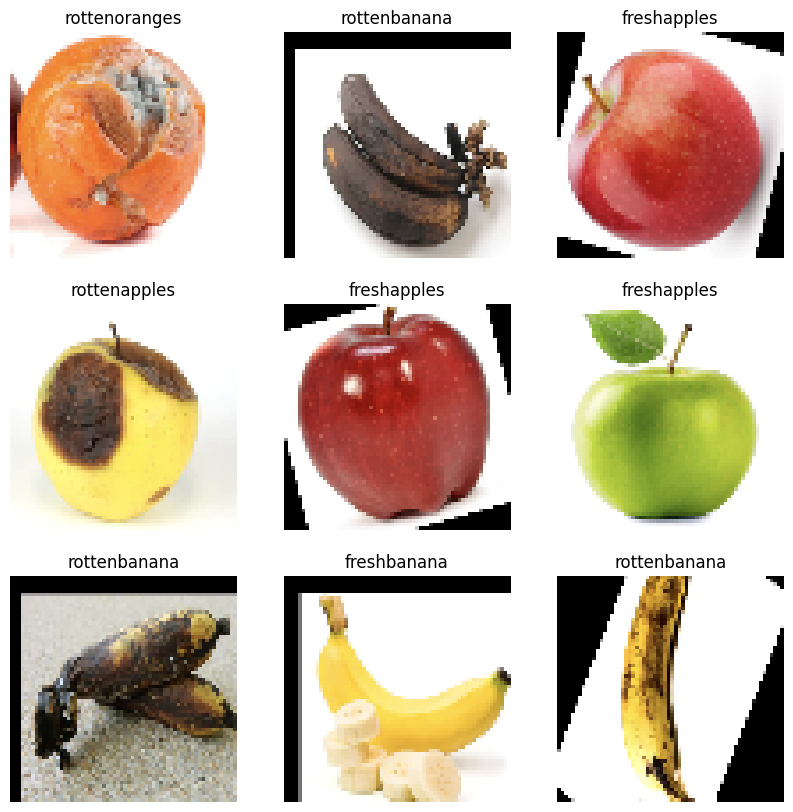

In [16]:
print("Preparing to plot the first 9 images from the batch...")
plt.figure(figsize=(10, 10))

# Use the 'images' and 'labels' variables we loaded in Cell 7
for i in range(9):
    plt.subplot(3, 3, i + 1)
    # Images are loaded as floats, we convert to integers for display
    plt.imshow(images[i].numpy().astype("uint8"))

    # Find the index of the '1' in the one-hot encoded label
    class_index = np.argmax(labels[i])

    plt.title(class_names[class_index])
    plt.axis("off")

print("Displaying one batch of 9 images from the training set.")
plt.show()

###New Cell: Visualizing the 64x64 Resize
You asked why we picked IMG_SIZE = 64. Let's visualize what that resizing looks like. We'll load one image from the disk twice: once in its original size and once resized to 64x64.

You can see how the 64x64 version is much smaller and "blockier," but it still keeps the main features (the apple's shape and color).

Loading example image: /root/.cache/kagglehub/datasets/sriramr/fruits-fresh-and-rotten-for-classification/versions/1/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.01.15 PM.png


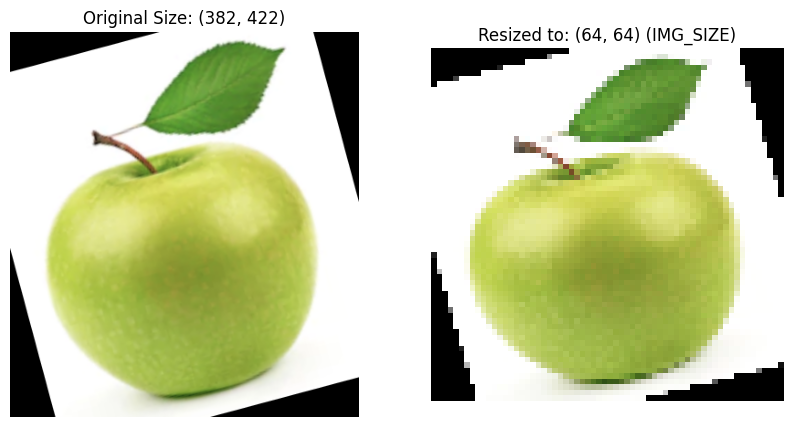

In [17]:
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import os

# --- Find an example image ---
# NOTE: This assumes you have 'freshapples' folder in your train_dir
# We'll get the first image we find in that folder
try:
    example_img_folder = os.path.join(train_dir, 'freshapples')
    example_img_name = os.listdir(example_img_folder)[0]
    example_img_path = os.path.join(example_img_folder, example_img_name)

    print(f"Loading example image: {example_img_path}")

    # --- Load images ---
    # 1. Load the original
    original_img = load_img(example_img_path)

    # 2. Load the 64x64 version
    resized_img = load_img(example_img_path, target_size=(IMG_SIZE, IMG_SIZE))

    # --- Plot them side-by-side ---
    plt.figure(figsize=(10, 5))

    # Plot Original
    plt.subplot(1, 2, 1)
    plt.title(f"Original Size: {original_img.size}")
    plt.imshow(original_img)
    plt.axis('off')

    # Plot Resized
    plt.subplot(1, 2, 2)
    plt.title(f"Resized to: {resized_img.size} (IMG_SIZE)")
    plt.imshow(resized_img)
    plt.axis('off')

    plt.show()

except FileNotFoundError:
    print("\n---")
    print("Could not find the 'freshapples' directory to load an example.")
    print(f"Please make sure your train_dir is set correctly. Current path: {train_dir}")
except Exception as e:
    print(f"An error occurred: {e}")

##Cell 9: Configure Dataset for Performance
These are two more "TensorFlow Basics" that make training much faster.

.cache(): Keeps the images in memory after they're loaded (good for smaller datasets).

.prefetch(): Pre-loads the next batch of images while the model is training on the current batch.

In [18]:
AUTOTUNE = tf.data.AUTOTUNE
print(f"Set AUTOTUNE to: {AUTOTUNE}")

Set AUTOTUNE to: -1


In [19]:
# Apply .cache() to the training dataset
train_ds = train_dataset.cache()
print("Applied .cache() to training dataset.")

Applied .cache() to training dataset.


In [20]:
# Apply .prefetch() to the training dataset
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
print("Applied .prefetch() to training dataset.")

Applied .prefetch() to training dataset.


In [21]:
# Apply .cache() to the validation dataset
val_ds = validation_dataset.cache()
print("Applied .cache() to validation dataset.")

Applied .cache() to validation dataset.


In [22]:
# Apply .prefetch() to the validation dataset
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
print("Applied .prefetch() to validation dataset.")

Applied .prefetch() to validation dataset.


###Learning Note: .cache() and .prefetch()

Think of this as efficient cooking.

Without .prefetch(): You (the GPU) are a chef. You cook a dish (train Batch 1), then you walk to the fridge to get ingredients for the next dish (load Batch 2). Your stove (GPU) is idle while you're walking.

With .prefetch(): You (the GPU) hire an assistant (the CPU). While you are cooking Batch 1, your assistant gets all the ingredients for Batch 2 ready. The moment you finish Batch 1, Batch 2 is waiting for you. This keeps the GPU "fed" and minimizes idle time.

.cache(): Caches the pre-processed data in memory so you don't have to re-read and re-process it from the disk every epoch.

##Cell 10: Build the Multi-Layer ANN (MLP)
Now, we'll build the exact same kind of model as Day 1.

Rescaling Layer: First, we'll normalize pixels from 0-255 to 0-1.

Flatten Layer: This is the key. We will "unroll" the 64x64x3 image into a single, flat vector.

Dense (Hidden) Layers: Two hidden layers with relu activation.

Dense (Output) Layer: A final layer with 6 neurons (one for each class) and softmax.

##Cell 10a: Building the Model Architecture
We will define our Sequential model. Think of this as a stack of layers, one on top of the other.

Input: (64, 64, 3)

Rescaling: Normalizes pixels.

Flatten: Converts (64, 64, 3) -> (12288)

Dense: Hidden layer 1 (128 neurons). Learns simple patterns.

Dense: Hidden layer 2 (64 neurons). Learns combinations of patterns.

Dense: Output layer (6 neurons). Makes the final decision.

In [23]:
model_mlp = tf.keras.Sequential([
    # 1. Rescale pixels
    tf.keras.layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),

    # 2. Flatten the 64x64x3 image into a vector
    tf.keras.layers.Flatten(),

    # 3. Hidden layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    # 4. Output layer
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

print("MLP model built successfully.")
print("Architecture:")
print("  1. Rescaling (1./255)")
print("  2. Flatten")
print("  3. Dense (128 units, relu)")
print("  4. Dense (64 units, relu)")
print("   5. Dense (6 units, softmax)")

MLP model built successfully.
Architecture:
  1. Rescaling (1./255)
  2. Flatten
  3. Dense (128 units, relu)
  4. Dense (64 units, relu)
   5. Dense (6 units, softmax)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##Cell 11: Model Summary - The "Gotcha"
Let's look at the summary. Pay very close attention to the number of parameters.

In [24]:
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,638 (6.03 MB)

 Trainable params: 1,581,638 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

Analysis: 1.5 MILLION Parameters!

The flatten layer output is 12288 (which is 64 * 64 * 3).

The first dense layer has 1,573,000 parameters!

Why? Because every single one of the 12,288 pixels needs to be connected to every one of the 128 neurons. (12288 * 128) + 128 = 1,573,000.

This is a massive network. It's very likely to overfit (memorize the training data) and will be slow to train. This is the "limit" of MLPs for images.

##Cell 12: Compile the Model
Let's compile the model.

Loss: categorical_crossentropy is correct because our labels are one-hot encoded.

Optimizer: adam is a great default.

In [25]:
model_mlp.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("MLP model compiled.")
print(f"  Optimizer: adam")
print(f"  Loss: categorical_crossentropy")
print(f"  Metrics: ['accuracy']")

MLP model compiled.
  Optimizer: adam
  Loss: categorical_crossentropy
  Metrics: ['accuracy']


#Cell 13: What is Backpropagation?
Before we train, let's talk about the Backpropagation concept.

When we call model.fit(), a 4-step cycle happens for every batch:

Forward Pass: A batch of images flows forward through the network. The weights at each layer modify the data until the final layer makes a (probably bad) prediction.

Loss Calculation: The loss function (categorical_crossentropy) compares the bad prediction to the true label and calculates a single "error" or "loss" score.

Backward Pass (Backpropagation): This is the magic. TensorFlow calculates the gradient (think: "blame") for the loss with respect to every single weight in the network. It uses the chain rule to "propagate" this error backward from the output layer to the input layer.

Optimization: The adam optimizer gets this "blame" report (the gradients) and "nudges" every weight just a little bit in the direction that will reduce the loss.

This cycle repeats thousands of times. That's "training."

##Cell 14: Train the Model
Now, let's train our giant MLP. We'll train for 10 epochs and see what happens.

validation_data=val_ds tells the model to check its performance on the unseen test data after every epoch.

In [27]:
print("Starting MLP model training for 10 epochs...")
# We'll save the history to plot it later
history_mlp = model_mlp.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    verbose=1 # Show progress
)

print("\nMLP training complete.")

Starting MLP model training for 10 epochs...
Epoch 1/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.4051 - loss: 2.0692 - val_accuracy: 0.6256 - val_loss: 1.0344
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6800 - loss: 0.8720 - val_accuracy: 0.7161 - val_loss: 0.7570
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7363 - loss: 0.7198 - val_accuracy: 0.7817 - val_loss: 0.6014
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7780 - loss: 0.6186 - val_accuracy: 0.7976 - val_loss: 0.5749
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7947 - loss: 0.5786 - val_accuracy: 0.7746 - val_loss: 0.6044
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8108 - loss: 0.5357 - val_accuracy: 0.8106 - val_loss: 0.5202
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8267 - loss: 0.4742 - val_accuracy: 0.8128 - val_loss: 0.5142
Epoch 8/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/s

##Cell 15: Visualize Training History
The history_mlp object contains all the data from training. To make it easy to plot, we'll convert it to a pandas.DataFrame.

In [28]:
import pandas as pd
history_df = pd.DataFrame(history_mlp.history)

print("Training history converted to DataFrame. First 5 epochs:")
print(history_df.head())

Training history converted to DataFrame. First 5 epochs:
   accuracy      loss  val_accuracy  val_loss
0  0.532428  1.329828      0.625649  1.034360
1  0.702688  0.817704      0.716086  0.757041
2  0.754151  0.676896      0.781690  0.601413
3  0.783231  0.598447      0.797628  0.574898
4  0.799101  0.555481      0.774648  0.604447


##Cell 15b: Visualize Training History (Loss)
Let's plot the "loss" (error).

loss: The model's error on the training data.

val_loss: The model's error on the unseen validation data.

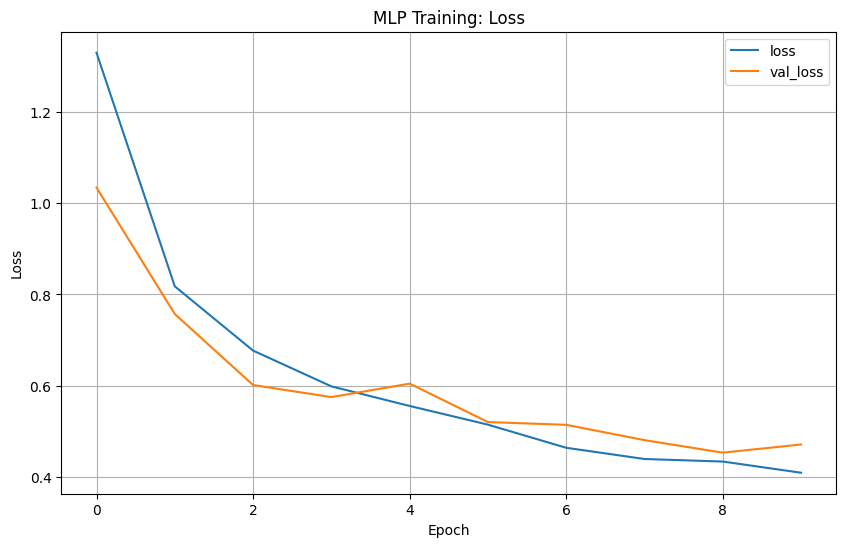

Loss plot displayed.


In [29]:
history_df[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.title("MLP Training: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

print("Loss plot displayed.")

##Cell 16: Visualize Training History (Accuracy)
Now let's plot the "accuracy."

accuracy: The model's accuracy on the training data.

val_accuracy: The model's accuracy on the unseen validation data.

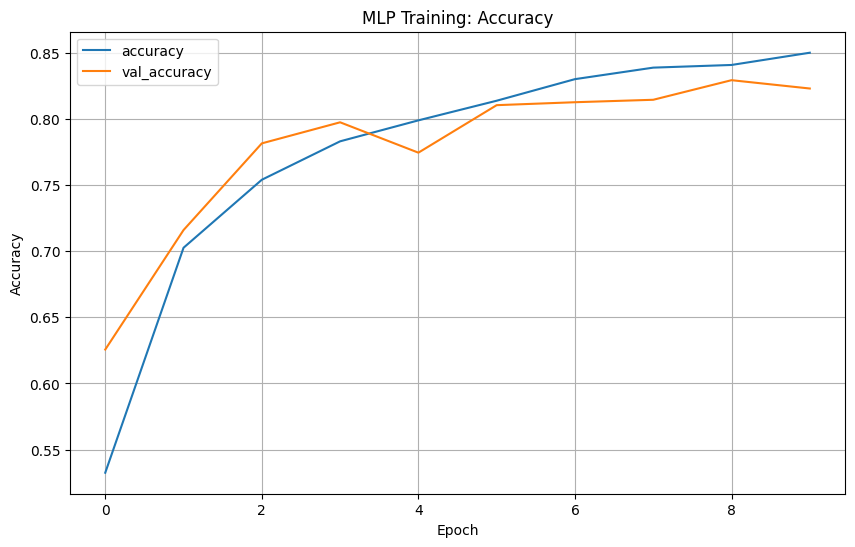

Accuracy plot displayed.


In [30]:
history_df[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.title("MLP Training: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print("Accuracy plot displayed.")

##Cell 17: Analyze the Results (The Failure)
Look at your plots. You will see:

This is a classic case of MASSIVE OVERFITTING.

High Training Accuracy: The accuracy line (blue) probably went up to 90-100%. The model memorized the training data.

Low/Stagnant Validation Accuracy: The val_accuracy (orange) line is the real test. It probably got stuck at a low value (e.g., 50-70%) and may even go down.

Diverging Loss: The val_loss (orange loss) probably shot up while the loss (blue loss) went down.

The model failed to generalize. It learned the training images perfectly but can't apply that knowledge to new, unseen images.

In [31]:
# Let's get the final, best validation accuracy
final_acc = max(history_mlp.history['val_accuracy'])
print(f"The best validation accuracy our MLP achieved was: {final_acc * 100:.2f}%")

The best validation accuracy our MLP achieved was: 82.95%


##Visualizing Model (MLP) Predictions
Finally, let's do what you asked: take some random images from our validation (test) set and see what our MLP model actually predicted.

We'll show the "Predicted" label vs. the "True" label.

Green = Correct

Red = Incorrect

Given the ~80-82% validation accuracy from Cell 17, we should expect to see 1 or 2 red (incorrect) labels in this grid of 9. Let's see how it did.

Making predictions on a batch of validation images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Plotting prediction grid...


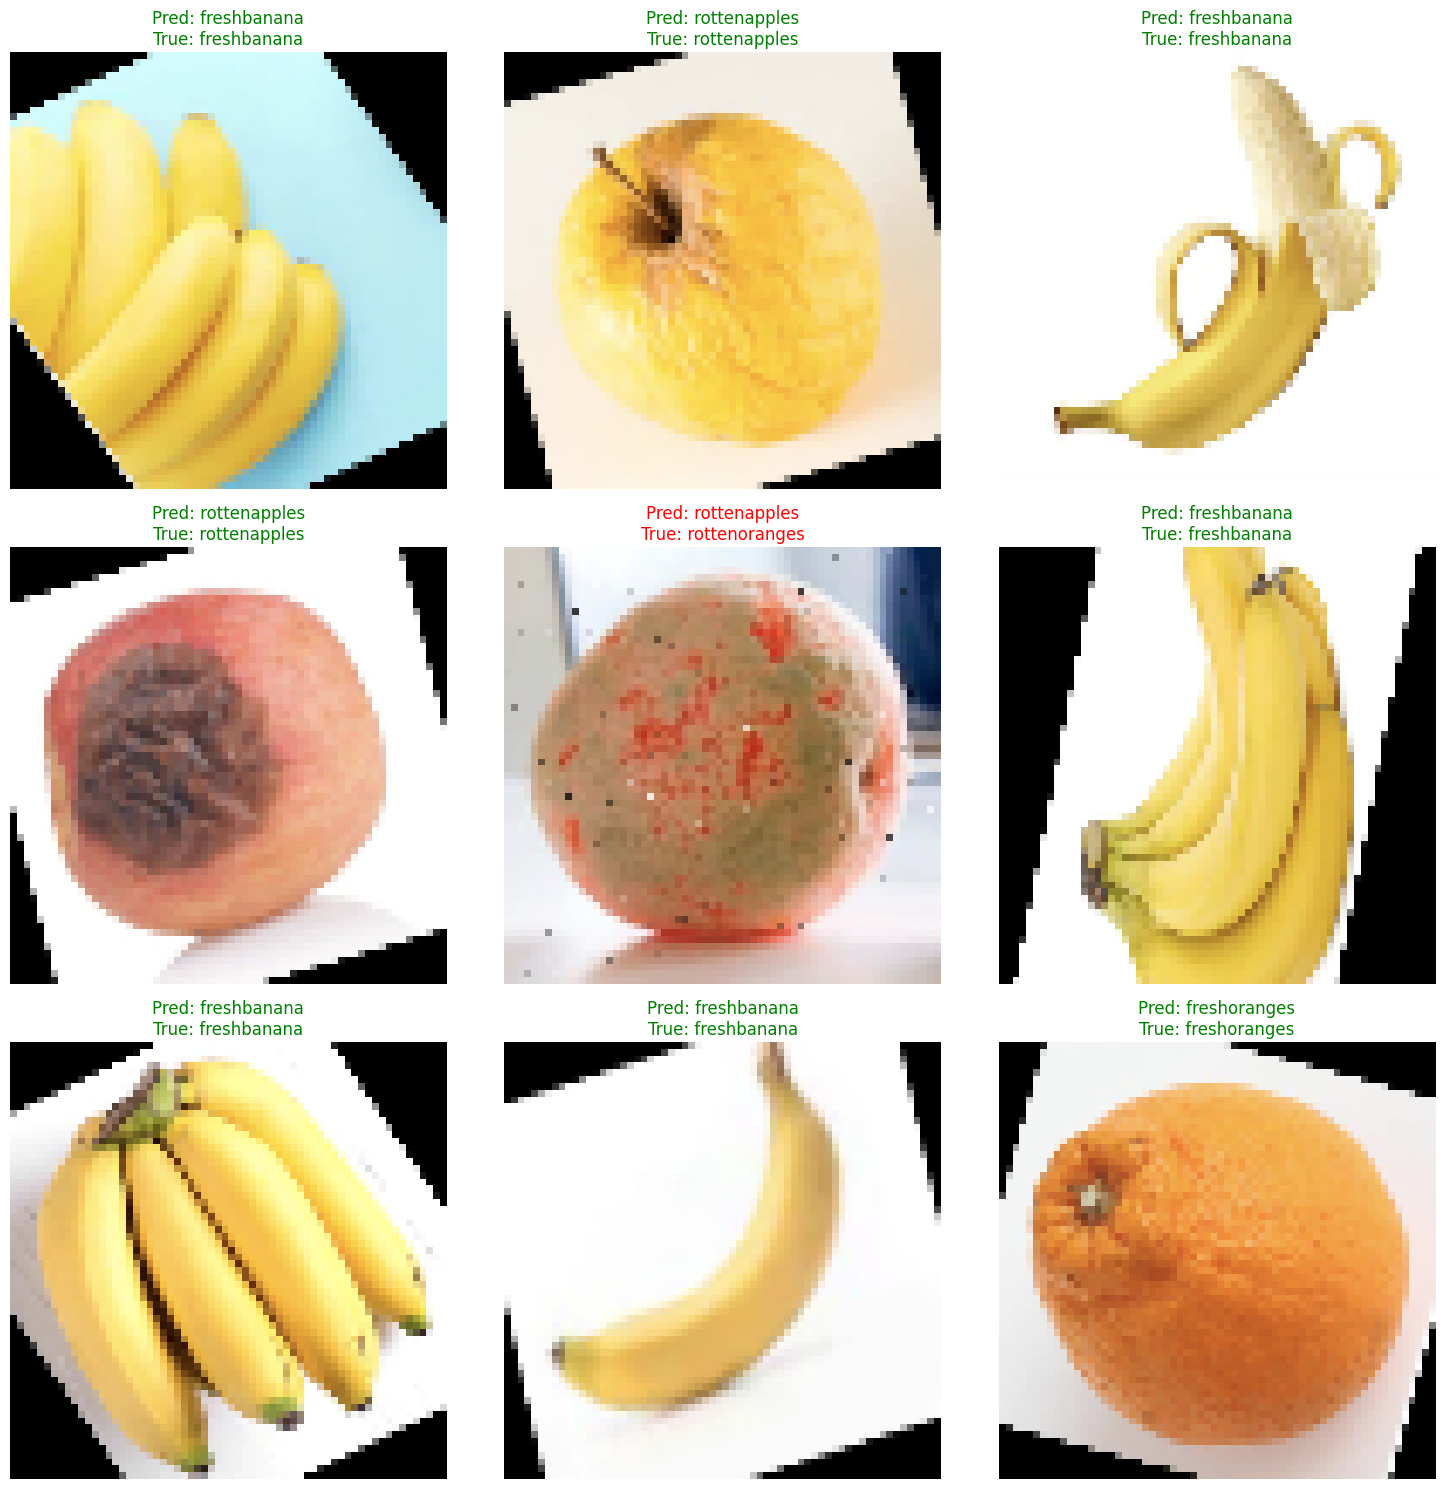

In [32]:
# Get one batch of images and labels from the validation set
# We use next(iter(...)) to grab a single batch
images_batch, labels_batch = next(iter(val_ds))

# Make predictions on this batch
print("Making predictions on a batch of validation images...")
predictions_batch = model_mlp.predict(images_batch)

# Get the predicted class indices (the index of the highest probability)
predicted_indices = np.argmax(predictions_batch, axis=1)
# Get the true class indices from the one-hot encoded labels
true_indices = np.argmax(labels_batch.numpy(), axis=1)

# --- Plot the results ---
plt.figure(figsize=(15, 15))
print("Plotting prediction grid...")

# We'll plot the first 9 images in the batch
for i in range(9):
    plt.subplot(3, 3, i + 1)

    # Show the image.
    # The dataset provides them as 0-255 floats, so we convert to integers.
    plt.imshow(images_batch[i].numpy().astype("uint8"))

    # Get the predicted and true labels from our class_names list
    pred_label = class_names[predicted_indices[i]]
    true_label = class_names[true_indices[i]]

    # Set the color
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

#Day 2 Conclusion
Why did our model fail so badly?

Because we used a Flatten layer.

We took our 64x64x3 image and "unrolled" it into a 12,288 pixel-long vector. This destroyed all spatial information.

The model has no idea that one pixel is "above" or "next to" another.

It can't learn "features" like "a curved yellow edge" (a banana) or "a round red shape" (an apple).

It just sees 12,288 jumbled features, which led to a massive 1.5M+ parameter network that simply memorized the training set.

##How do we fix this? We need a model that understands 2D space. A model that can look for features, patterns, and textures within the 2D image.

Next , we will solve this exact same problem using a Convolutional Neural Network (CNN).